
 <center> <h1> <b> Pattern Recognition and Machine Learning (EE2802 - AI2000) </b> </h1> </center>

<b> Programming Assignment 01 - KNN : </b> Welcome to the programming assignment (PA) on k-nearest neighbors (KNN) classification. Throughout this PA, you will explore the k-NN algorithm, a versatile and intuitive method for tackling classification and regression challenges. Specifically, this assignment aims to enhance your understanding of the KNN classification algorithm. In this PA, we expect you to implement and experiment with the KNN classifier to understand how variations in 'k' and distance metrics influence classification performance.

<b> Instructions </b>
1. Plagiarism is strictly prohibited.
2. Delayed submissions are not accepted
3. Please DO NOT use any machine learning libraries unless and otherwise specified.



<b> Part(a): Synthetic data generation </b>  

1. Consider four bivariate Gaussians with means at (0,0), (0,1), (1,0), and (1,1), each with a diagonal covariance matrix with diagonal elements being 0.1. Sample 90 points from each Gaussian, resulting in a total of 360 points. Allocate 30 points from each Gaussian for training and 60 points for testing. This results in a total of 120 points for training and 240 points for testing.

2. Create a 2-class training set ($[X_{train}, Y_{train}]$) and a test set ($[X_{test}, Y_{test}]$) by labeling the data sampled from Gaussians with means at (0,0) and (1,1) as class 1, and the data sampled from Gaussians with means at (0,1) and (1,0) as class 2. Assign a label of +1 to class1 and -1 to class2.

4. Visualize both train and test sets using the scatter plot on a 2-D plane. Indicate the data points from class 1 with a green color and those from class 2 with a blue color.

<b> Part(b): KNN Classification - </b> The k-Nearest Neighbors (KNN) classifier algorithm is a straightforward yet powerful tool for classification tasks. The KNN classifier takes the test data point, computes distances to all points in the training set, identifies the 'k' nearest neighbors based on these distances, and assigns the test data to the class that the majority of its neighbors belong to.

<b> Programming questions </b>


1. Develop a Python class named 'KNeighbourClassifier' that encapsulates the hyperparameters of a K-Nearest Neighbors (KNN) classifier, such as the number of neighbors (k) and the distance metric. Implement the following methods within this class. $\textit{fit(X_train, y_train):}$ This method should accept training data (X_train) and corresponding labels (y_train) as input. It should store these inputs as internal attributes of the class for later use in prediction. $\textit{predict(X_test):} This method should take test data (X_test) as input and return the predicted labels for the given data points using the KNN algorithm.

2. Instantiate an object of the KNeighbourClassifier class. Train the classifier on the provided training data by calling the fit() method. Use this trained classifier to predict the labels of the test data. Finally, evaluate the classifier's accuracy by comparing the predicted labels with the actual (original) labels of the test data

3. Generate a 2D scatter plot of the test data, assigning green to class 1, blue to class 2, and red to test data points whose predicted labels do not match their true labels.

4. Visualize the decision boundaries of a given classifier by generating a 2D grid and predicting the class labels for each point in the grid using the KNN algorithm. Color-code the grid points based on their predicted class labels to visually represent the decision regions

<b> Part(c): Parameter selection: What is good value for k? - </b> A common approach to finding the optimal value for the hyperparameter 'k' in K-Nearest Neighbors is through cross-validation. In this method, a portion (ρ%) of the training data is set aside as a validation set. The KNN model is then trained on the remaining data and evaluated on the validation set for a range of 'k' values. The optimal 'k' is selected as the value that results in the best performance on the validation set.

<b> Algorithm </b>

1. Perform hold-out cross-validation by setting aside a fraction (ρ of the training set for validation. Note: You may use ρ = 0.3, and repeat the procedure 10 times. The hold-out procedure may be quite unstable.
2. Use a large range of candidate values for k (e.g. k = 1, 3, 5..., 21). Notice odd numbers are considered to avoid ties.
3. Repeat the process for 10 times using a random cross-validation set each time with a ρ = 0.3.
4. Plot the training and validation errors for the different values of k.

<b> Questions </b>

5. How would you now answer the question "what is the best value for k"?
6. How is the value of k affected by ρ (percentage of points held out) and number of repetitions? What does a large number of repetitions provide?
7. Apply the model obtained by cross-validation (i.e., best k) to the test set and check if there is an improvement on the classification error over the result of Part (b).

<b> Part(d): Influence of training data on KNN classifier - </b>

1. Evaluate the performance as the size of the training set
grows, e.g., n = {200, 400, 1200,...}. How would you choose a good range for k as n changes? What can you say about the stability of the solution? Check by repeating the validation multiple times.

2. Investigate how the distribution of the training data affects the performance of the KNN algorithm. Replace the Gaussian distribution used in part (a) with a Laplacian distribution. Generate both training and testing datasets based on these distributions. Evaluate the KNN classifier's performance on both datasets. Analyze whether the KNN achieves comparable performance with both Gaussian and Laplacian distributed data. Examine the effect of changing the distance metric from $l_{2}$ to $l_{1}$ on the KNN performance for both Gaussian and Laplacian distributed datasets


<b> Part(e): What is the influence of distance measure on decision regions ? - </b>

1. Evaluate the performance of the KNN classifier with different distance measures such as $l_{1}$, $l_{2}$, etc,.
2. Plot the decision regions of the KNN classifier with different distance measures.
3. Report your observations.  

<b> Part(f): MNIST Digit classification using KNN classifier: </b> :

1. Use the above written KNN classifier to perform digit claissification using MNIST digit dataset.
2. The MNIST dataset consists of approximately 70,000 images of handwritten digits. Create training, validation, and test datasets from this entire dataset with the respective proportions of 80%, 10%, and 10%. The 28x28 images in the MNIST data set may be flattened to arrive at a 784 dimensional vector.
3. Use the most suitable distance metric and k to maximize the test data performance.
4. Create a confusion matrix to understand the most confused classes (digits).
5. Suggest alternate ways to improve the performance.



In [ ]:
#All imports
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import random
import math
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

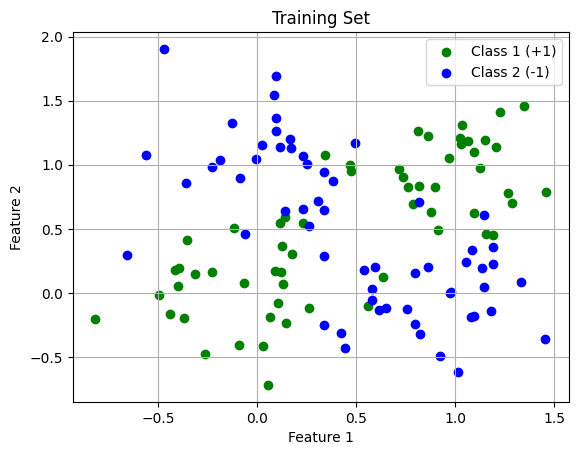

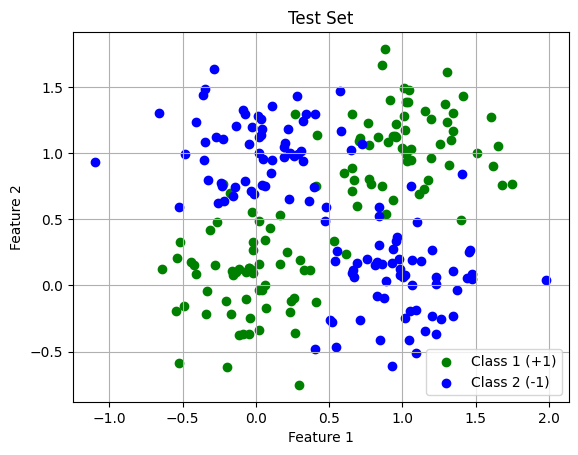

In [ ]:
########################################
#Part(a) #Synthetic data generation
########################################
#Define means and covariances
mean1= np.array([0, 0])
mean2= np.array([0, 1])
mean3= np.array([1, 0])
mean4= np.array([1, 1])
cov= np.array([[0.1, 0], [0, 0.1]])

#Sample data points from the bivariate Gaussian distribution
#You can use "np.random.multivariate_normal" function to sample the data points from the multivariate Gaussian distribution
np.random.seed(54353)
data_00 = np.random.multivariate_normal(mean1, cov, 90)
data_01 = np.random.multivariate_normal(mean2, cov, 90)
data_10 = np.random.multivariate_normal(mean3, cov, 90)
data_11 = np.random.multivariate_normal(mean4, cov, 90)

#Generate training data
X_train = np.concatenate((data_00[:30], data_11[:30], data_01[:30], data_10[:30]))
Y_train = np.concatenate((np.ones(60), -np.ones(60)))

training_data = [X_train, Y_train]

#Generate testing data
X_test = np.concatenate((data_00[30:], data_11[30:], data_01[30:], data_10[30:]))
Y_test = np.concatenate((np.ones(120), -np.ones(120)))

test_data = [X_test, Y_test]


#Visualize the data using plt.scatter() function
plt.scatter(X_train[:60, 0], X_train[:60, 1], color='green', label='Class 1 (+1)')
plt.scatter(X_train[60:, 0], X_train[60:, 1], color='blue', label='Class 2 (-1)')
plt.title("Training Set")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()

# test data
plt.scatter(X_test[:120, 0], X_test[:120, 1], color='green', label='Class 1 (+1)')
plt.scatter(X_test[120:, 0], X_test[120:, 1], color='blue', label='Class 2 (-1)')
plt.title("Test Set")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()

Accuracy of the classifier is,  0.9125


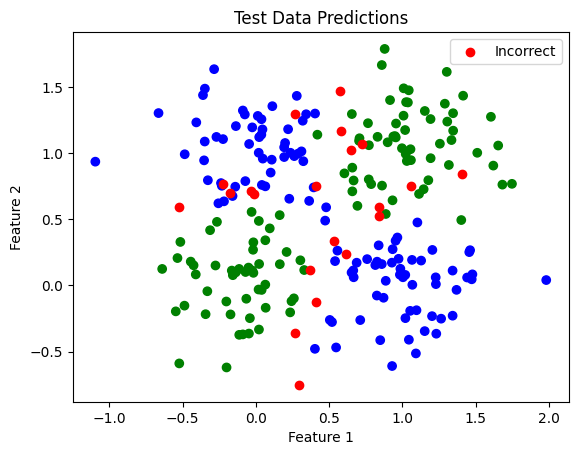

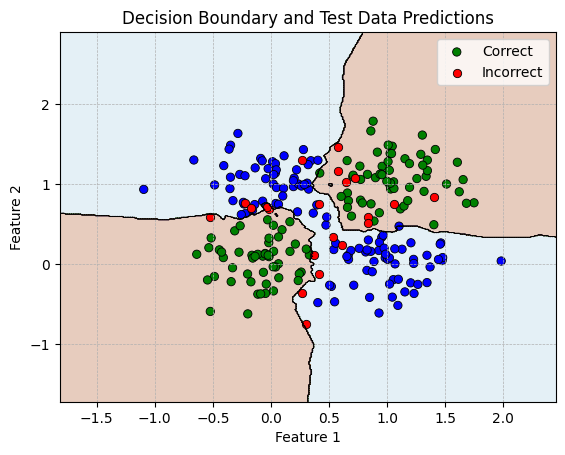

In [ ]:
########################################
#Part(b) #KNN classification
########################################

#Write "kNNClassify" function
class KNeighborsClassifier:
    """
    K-Nearest Neighbors Classifier
    This class implements the k-nearest neighbors algorithm for classification.
    """
    def __init__(self, n_neighbors=5,distance_metric="l2"):
        #Initializes the KNeighborsClassifier with the specified number of neighbors. Defaults to 1.
        #Default distance_metric is L2 norm

        self.n_neighbors = n_neighbors
        self.distance_metric = distance_metric
        self.X_train = None
        self.y_train = None

    def fit(self, X_train,y_train):
        #This method fits the k-nearest neighbors classifier from the training data. X_train is the training data, represented as a numpy array of shape (n_samples, n_features), and Y_train is the target values of the training data, represented as a numpy array of shape (n_samples,)
        self.X_train = X_train
        self.y_train = y_train

    def compute_distances(self, test_point):
        # Compute distances based on the chosen metric
        if self.distance_metric == "l2":  # Euclidean distance
            return np.linalg.norm(self.X_train - test_point, axis=1)
        elif self.distance_metric == "l1":  # Manhattan distance
            return np.sum(np.abs(self.X_train - test_point), axis=1)
        else:
            raise ValueError("Unsupported distance metric. Choose 'l1' or 'l2'.")

    def predict(self, X_test):
        #This method predicts the class labels for a set of data samples. X_test is the data to be predicted, represented as a numpy array of shape (n_samples, n_features)
        predictions = []
        for x in X_test:
            nindices = np.argsort(self.compute_distances(x))[:self.n_neighbors]
            nlabels = self.y_train[nindices]
            predictions.append(np.sign(np.sum(nlabels)))

        return np.array(predictions)






#Write "KNNAccuracy" function
def KNNAccuracy(true, pred):
    #Inputs : Ground truth and predicted labels
    #Outputs : Portion of data points that are correctly classified, i.e., accuracy
    return np.mean(true == pred)

# Use of KNN Classifier
knn = KNeighborsClassifier(5, "l2")
knn.fit(X_train, Y_train)
training_prediction = knn.predict(X_test)
print("Accuracy of the classifier is, ", KNNAccuracy(Y_test, training_prediction))


#Create a visual representation of predictions
correct = (Y_test == training_prediction)
plt.scatter(X_test[correct, 0], X_test[correct, 1], c=["green" if label == 1 else "blue" for label in Y_test[correct]])
plt.scatter(X_test[~correct, 0], X_test[~correct, 1], c="red", label="Incorrect")
plt.legend()
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Test Data Predictions")
plt.show()

#Generate and visualize the decision regions and overlay the test points

h = 0.01  # Step size for the mesh grid
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predict class labels for each point in the grid
grid_points = np.c_[xx.ravel(), yy.ravel()]
predicted_labels = knn.predict(grid_points)
predicted_labels = predicted_labels.reshape(xx.shape)

# Plot decision boundary
plt.contourf(xx, yy, predicted_labels, alpha=0.3, cmap=plt.cm.Paired)
plt.contour(xx, yy, predicted_labels, colors='black', linewidths=0.3)

# Overlay test data points
correct = (Y_test == training_prediction)
plt.scatter(X_test[correct, 0], X_test[correct, 1], c=["green" if label == 1 else "blue" for label in Y_test[correct]], edgecolors='black', linewidth=0.6, label="Correct")
plt.scatter(X_test[~correct, 0], X_test[~correct, 1], c="red", edgecolors='black', linewidth=0.6, label="Incorrect")


# Labels and title
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Decision Boundary and Test Data Predictions")
plt.legend()
plt.grid(True, linestyle='--', linewidth=0.5)
plt.show()


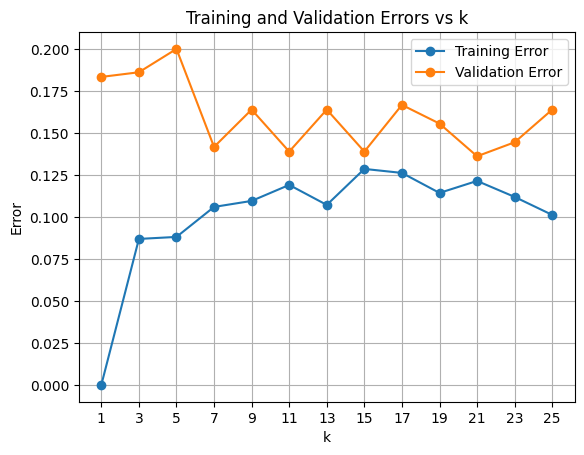

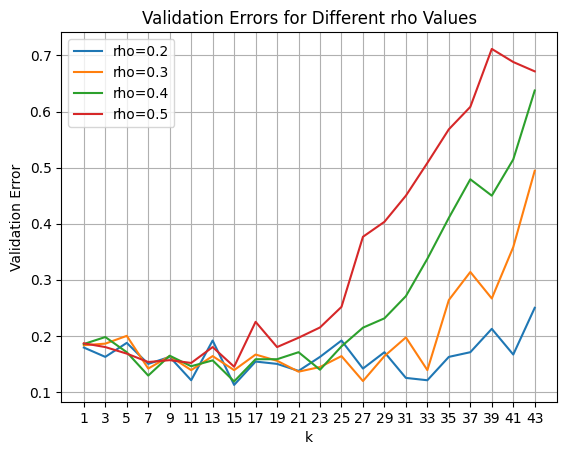

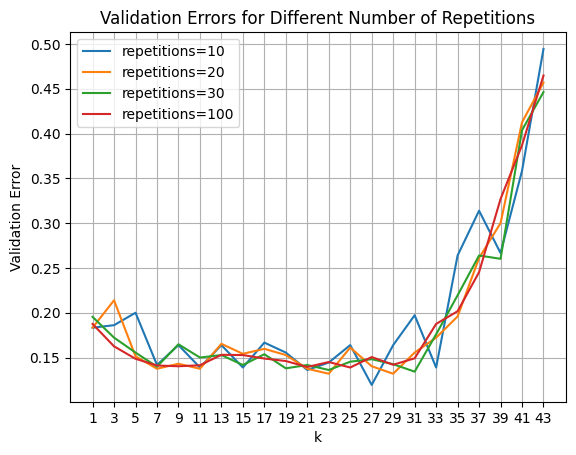

The optimal value of k from the cross validation is 19
Accuracy of the classifier is,  0.9125


In [ ]:
####################################
#Part(c): Parameter selection: What is good value for k?
####################################

# Define KNNAccuracy function
def KNNAccuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

#Write holdoutCVkNN() Function
def holdoutCVkNN(k_range, rho=0.3, repetitions=10):
  #Iterate through range of k values
    #Hold out rho fraction of training data in each repetition.
    training_errors = []
    validation_errors = []
    np.random.seed(36)

    for k in k_range:
      train_error = 0
      val_error = 0

      for _ in range(repetitions):  # Repeat the process 10 times
        # Shuffle the training data
        indices = np.arange(X_train.shape[0])
        np.random.shuffle(indices)
        X_train_shuffled = X_train[indices]
        Y_train_shuffled = Y_train[indices]

        # Split the data into training and validation sets
        split_index = int((1 - rho) * X_train.shape[0])
        X_train_split = X_train_shuffled[:split_index]
        Y_train_split = Y_train_shuffled[:split_index]
        X_val_split = X_train_shuffled[split_index:]
        Y_val_split = Y_train_shuffled[split_index:]

        # Train the KNN classifier
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train_split, Y_train_split)

        # Calculate training error
        train_predictions = knn.predict(X_train_split)
        train_error += 1 - KNNAccuracy(Y_train_split, train_predictions)

        # Calculate validation error
        val_predictions = knn.predict(X_val_split)
        val_error += 1 - KNNAccuracy(Y_val_split, val_predictions)

      # Average the errors over the repetitions
      training_errors.append(train_error / repetitions)
      validation_errors.append(val_error / repetitions)

    return training_errors, validation_errors
#Return errors on training and validation data

#Plot training and validation errors for different values of k
k_range = range(1, 27, 2)
training_errors, validation_errors = holdoutCVkNN(k_range)
best_k = k_range[np.argmin(validation_errors)]
plt.plot(k_range, training_errors, label='Training Error', marker='o')
plt.plot(k_range, validation_errors, label='Validation Error', marker='o')
plt.xlabel('k')
plt.ylabel('Error')
plt.title('Training and Validation Errors vs k')
plt.legend()
plt.grid(True)
plt.xticks(ticks=k_range)
plt.show()

#what is the best value for k?
# The best value for k is the one that minimizes the validation error.
# In this case, the training error is lowest when k=1 (error is 0). It slowly increases.
# The validation error and comes in range of training error from k = 13
# Optimum k should have both training and validation error as low as possible.

# best k based on:
#  training error is k = 1 (trivial case)
#  based on both training and validation error is k = 19



# Evaluate the effect of rho and number of repetitions on k

# effect of rho on k
rhos = [0.2, 0.3, 0.4, 0.5]
k_range = range(1, 45, 2)
for rho in rhos:
  _, validation_errors_rho = holdoutCVkNN(k_range, rho=rho)
  plt.plot(k_range, validation_errors_rho, label=f'rho={rho}')
plt.xlabel('k')
plt.ylabel('Validation Error')
plt.title('Validation Errors for Different rho Values')
plt.legend()
plt.grid(True)
plt.xticks(ticks=k_range)
plt.show()

# effect of repetitions on k
repetitions = [10, 20, 30, 100]
for rep in repetitions:
  _, validation_errors_rep = holdoutCVkNN(k_range, repetitions=rep)
  plt.plot(k_range, validation_errors_rep, label=f'repetitions={rep}')
plt.xlabel('k')
plt.ylabel('Validation Error')
plt.title('Validation Errors for Different Number of Repetitions')
plt.legend()
plt.grid(True)
plt.xticks(ticks=k_range)
plt.show()


#Evaluate the performance on test set with the best hyper parameters ( i.e best k ).

print("The optimal value of k from the cross validation is", 19)
knn = KNeighborsClassifier(19, "l2")
knn.fit(X_train, Y_train)
training_prediction = knn.predict(X_test)
print("Accuracy of the classifier is, ", KNNAccuracy(Y_test, training_prediction))


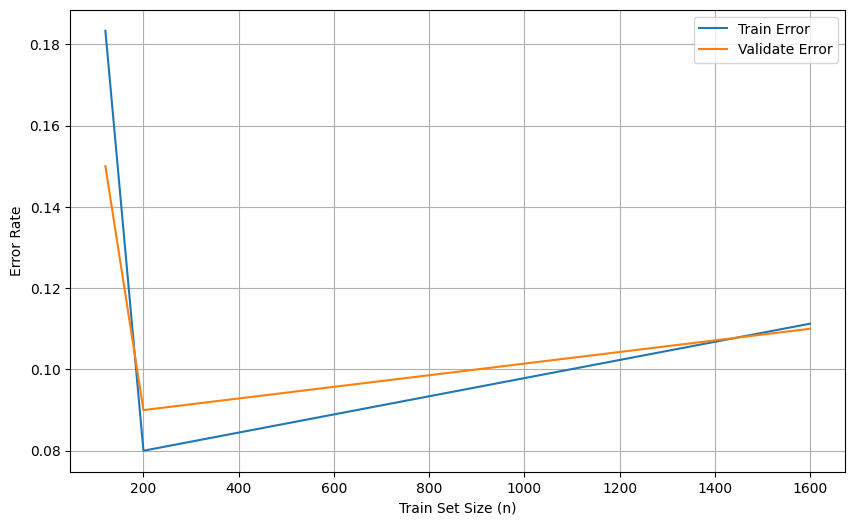

Gaussian Data with Euclidean Distance Metric
Accuracy with l2 distance: 91.25%


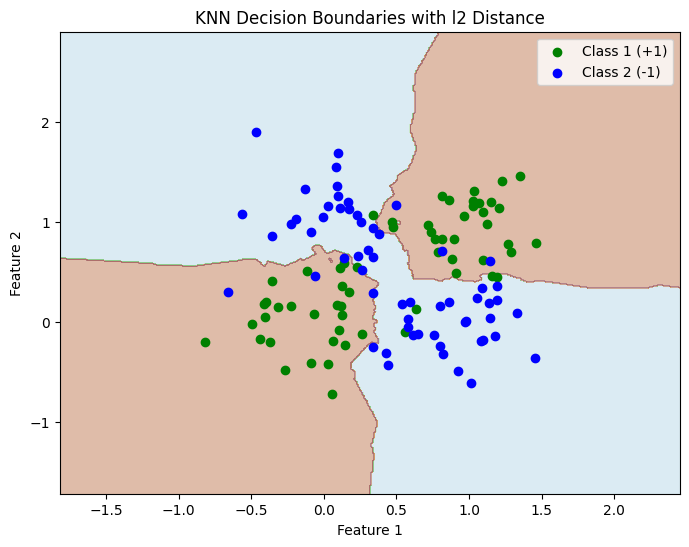

Gaussian Data with Manhattan Distance Metric
Accuracy with l1 distance: 92.08%


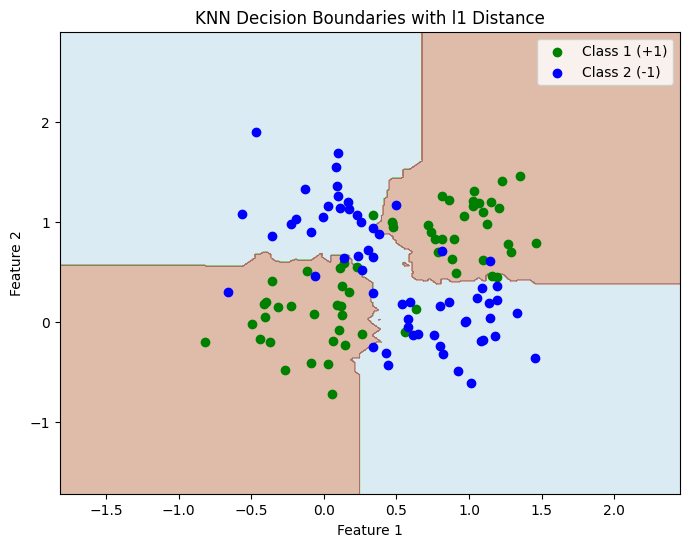

Laplacian Data with Euclidean Distance Metric
Accuracy with l2 distance: 82.08%


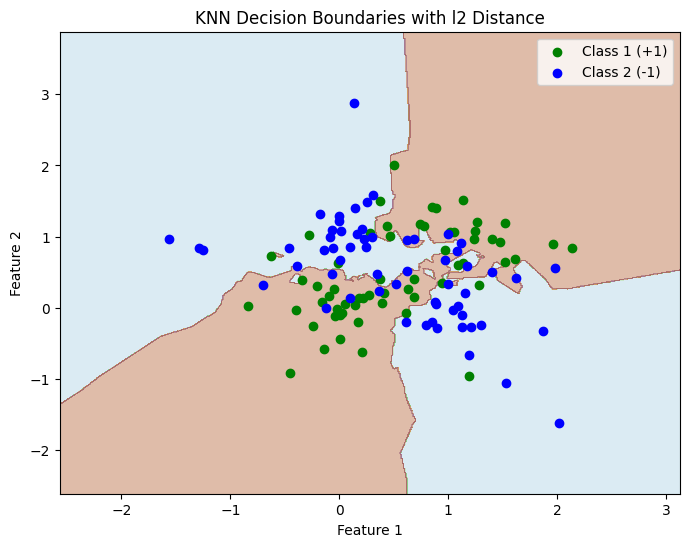

Laplacian Data with Manhattan Distance Metric
Accuracy with l1 distance: 82.50%


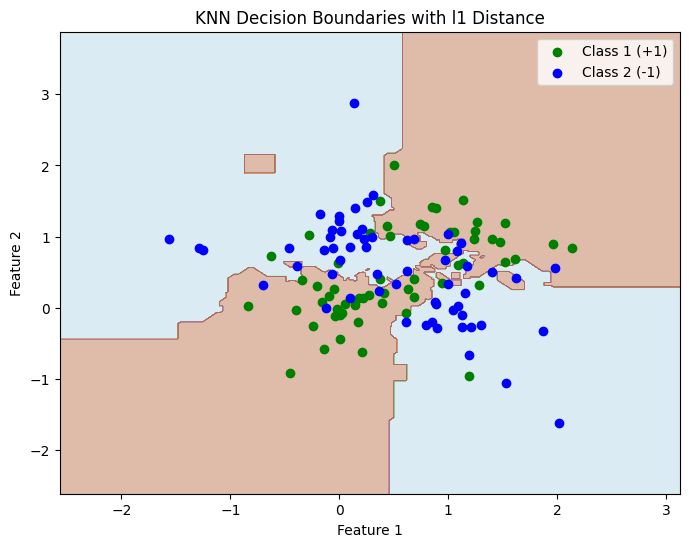

In [ ]:
##################################
#Part(d): Influence of training data on KNN classifier
##################################

def evaluate_and_plot_knn_performance(distance_metric, X_train, Y_train, X_test, Y_test):
   knn = KNeighborsClassifier(n_neighbors=5, distance_metric=distance_metric)
   knn.fit(X_train, Y_train)
   Y_pred = knn.predict(X_test)
   accuracy = KNNAccuracy(Y_test, Y_pred)
   print(f"Accuracy with {distance_metric} distance: {accuracy * 100:.2f}%")

   # Plot decision boundaries
   h = 0.01  # step size in the mesh
   x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
   y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
   xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
   Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
   Z = Z.reshape(xx.shape)

   plt.figure(figsize=(8, 6))
   plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.Paired)
   plt.scatter(X_train[Y_train == 1, 0], X_train[Y_train == 1, 1], color='green', label='Class 1 (+1)')
   plt.scatter(X_train[Y_train == -1, 0], X_train[Y_train == -1, 1], color='blue', label='Class 2 (-1)')
   plt.title(f"KNN Decision Boundaries with {distance_metric} Distance")
   plt.xlabel("Feature 1")
   plt.ylabel("Feature 2")
   plt.legend()
   plt.show()



#Performance evaluation as n increases

# Update evaluate_knn_with_varying_n to generate new training data
def evaluate_knn_with_varying_n(n_values, k):
    t_errors = []
    v_errors = []

    for n in n_values:
        np.random.seed(42)  # For reproducibility
        d1 = np.random.multivariate_normal(mean1, cov, n // 4)
        d2 = np.random.multivariate_normal(mean2, cov, n // 4)
        d3 = np.random.multivariate_normal(mean3, cov, n // 4)
        d4 = np.random.multivariate_normal(mean4, cov, n // 4)

        Xt_new = np.vstack((d1, d4, d2, d3))
        Yt_new = np.array([1] * (n // 2) + [-1] * (n // 2))

        # Split the new training data into training and validation sets
        n_val = int(rho * n)
        vindices = np.random.choice(n, n_val, replace=False)
        tindices = np.setdiff1d(np.arange(n), vindices)

        Xt_old = Xt_new[tindices]
        Yt_old = Yt_new[tindices]
        Xy_old = Xt_new[vindices]
        Yv_old = Yt_new[vindices]

        # Train and evaluate the KNN model
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(Xt_old, Yt_old)

        Yt_pred = knn.predict(Xt_old)
        Yv_pred = knn.predict(Xy_old)

        t_error = 1 - KNNAccuracy(Yt_old, Yt_pred)
        v_error = 1 - KNNAccuracy(Yv_old, Yv_pred)

        t_errors.append(t_error)
        v_errors.append(v_error)

    return t_errors, v_errors


n_values = [120, 200, 1600]
train_errors, val_errors = evaluate_knn_with_varying_n(n_values, best_k)

# Plot the training and validation errors
plt.figure(figsize=(10, 6))
plt.plot(n_values, train_errors, label="Train Error")
plt.plot(n_values, val_errors, label="Validate Error")
plt.xlabel("Train Set Size (n)")
plt.ylabel("Error Rate")
plt.legend()
plt.grid(True)
plt.show()





#Performance evaluation with different data distributions, i.e., Gaussian, Laplacian
lp_data_00 = np.column_stack((np.random.laplace(mean1[0], 0.3, 90), np.random.laplace(mean1[1], 0.3, 90)))
lp_data_01 = np.column_stack((np.random.laplace(mean2[0], 0.3, 90), np.random.laplace(mean2[1], 0.3, 90)))
lp_data_10 = np.column_stack((np.random.laplace(mean3[0], 0.3, 90), np.random.laplace(mean3[1], 0.3, 90)))
lp_data_11 = np.column_stack((np.random.laplace(mean4[0], 0.3, 90), np.random.laplace(mean4[1], 0.3, 90)))

lp_X_train = np.concatenate((lp_data_00[:30], lp_data_11[:30], lp_data_01[:30], lp_data_10[:30]))
lp_Y_train = np.concatenate((np.ones(60), -np.ones(60)))

training_data = [lp_X_train, lp_Y_train]

lp_X_test = np.concatenate((lp_data_00[30:], lp_data_11[30:], lp_data_01[30:], lp_data_10[30:]))
lp_Y_test = np.concatenate((np.ones(120), -np.ones(120)))

test_data = [lp_X_test, lp_Y_test]

# Evaluate and plot KNN performance for Gaussian data
print("Gaussian Data with Euclidean Distance Metric")
evaluate_and_plot_knn_performance("l2", X_train, Y_train, X_test, Y_test)
print("Gaussian Data with Manhattan Distance Metric")
evaluate_and_plot_knn_performance("l1", X_train, Y_train, X_test, Y_test)

# Evaluate and plot KNN performance for Laplacian data
print("Laplacian Data with Euclidean Distance Metric")
evaluate_and_plot_knn_performance("l2", lp_X_train, lp_Y_train, lp_X_test, lp_Y_test)
print("Laplacian Data with Manhattan Distance Metric")
evaluate_and_plot_knn_performance("l1", lp_X_train, lp_Y_train, lp_X_test, lp_Y_test)






Accuracy with l2 distance: 91.25%


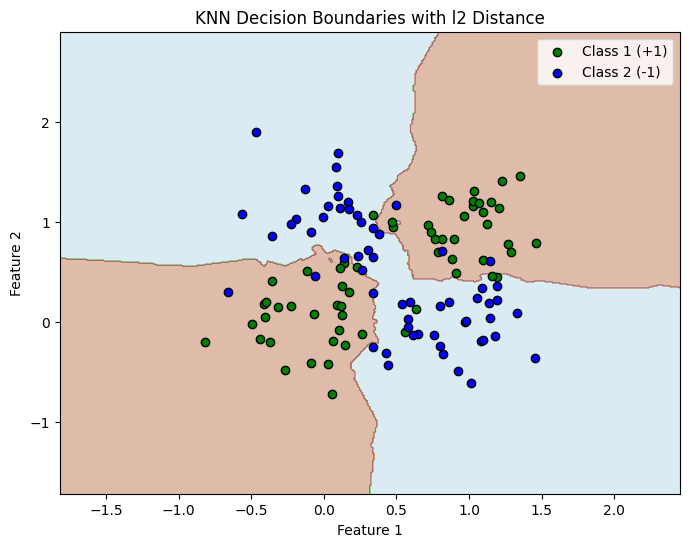

Accuracy with l1 distance: 92.08%


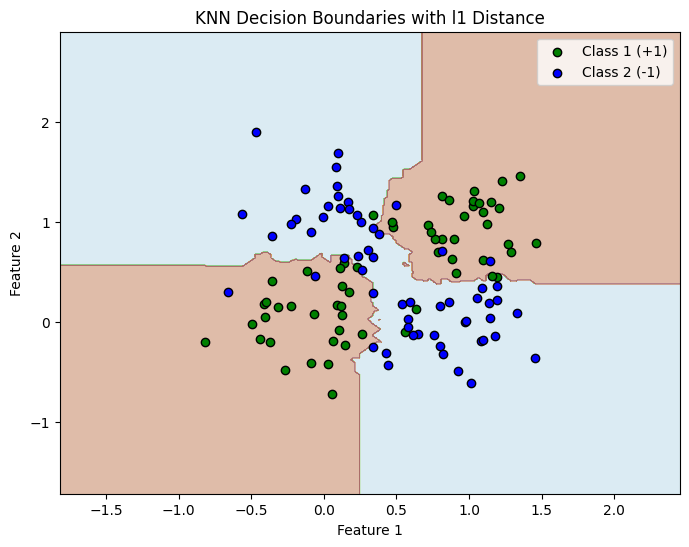

In [ ]:
##################################
#Part(e): Influence of distance metric on KNN classifier
##################################
#Performance evaluation of KNN classifier with different distance metric






#Understand the decision regions of KNN classifier with different distance metric

# for l2 distance
distance_metric = "l2"
knn = KNeighborsClassifier(n_neighbors=5, distance_metric=distance_metric)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
accuracy = KNNAccuracy(Y_test, Y_pred)
print(f"Accuracy with {distance_metric} distance: {accuracy * 100:.2f}%")

# Plot decision boundaries
h = 0.01  # step size in the mesh
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.Paired)
plt.scatter(X_train[Y_train == 1, 0], X_train[Y_train == 1, 1], color='green', label='Class 1 (+1)', edgecolor='k')
plt.scatter(X_train[Y_train == -1, 0], X_train[Y_train == -1, 1], color='blue', label='Class 2 (-1)', edgecolor='k')
plt.title(f"KNN Decision Boundaries with {distance_metric} Distance")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

# for l1 distance
distance_metric = "l1"
knn = KNeighborsClassifier(n_neighbors=5, distance_metric=distance_metric)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
accuracy = KNNAccuracy(Y_test, Y_pred)
print(f"Accuracy with {distance_metric} distance: {accuracy * 100:.2f}%")

# Plot decision boundaries
h = 0.01  # step size in the mesh
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.Paired)
plt.scatter(X_train[Y_train == 1, 0], X_train[Y_train == 1, 1], color='green', label='Class 1 (+1)', edgecolor='k')
plt.scatter(X_train[Y_train == -1, 0], X_train[Y_train == -1, 1], color='blue', label='Class 2 (-1)', edgecolor='k')
plt.title(f"KNN Decision Boundaries with {distance_metric} Distance")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()






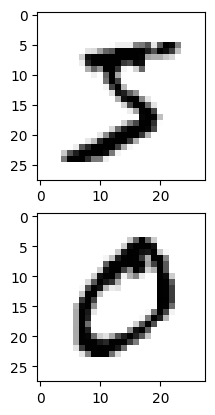

In [ ]:
##################################
#Part(f): MNIST Digit classification using KNN classifier
##################################

#Load MNIST data
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')
images = mnist.data.to_numpy()
targets = mnist.target.to_numpy()
#Plot a few images
plt.subplot(211)
plt.imshow((images[0].reshape(28,28)), cmap=plt.cm.gray_r, interpolation='nearest')
plt.subplot(212)
plt.imshow(images[1].reshape(28,28), cmap=plt.cm.gray_r, interpolation='nearest')

The error for k= 1 is: 0.07464607464607464
The error for k= 3 is: 0.07979407979407982
The error for k= 5 is: 0.07979407979407982
The error for k= 7 is: 0.10296010296010294
The error for k= 9 is: 0.0862290862290862
The error for k= 11 is: 0.09009009009009006
Best validation accuracy: 0.9253539253539254


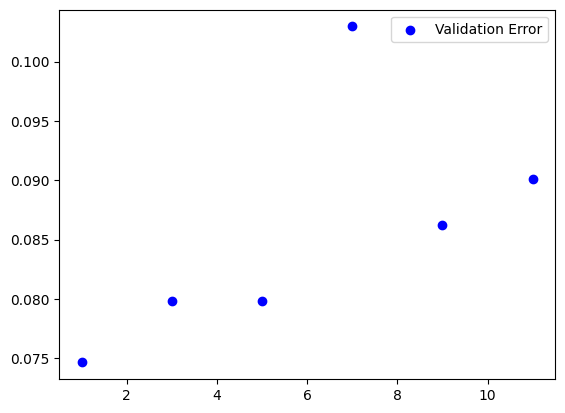

Errors in ascending order:  {1: 0.07464607464607464, 3: 0.07979407979407982, 5: 0.07979407979407982, 9: 0.0862290862290862, 11: 0.09009009009009006, 7: 0.10296010296010294}
The optimal value of k is 1
The accuracy for this value of k: 0.9245132851720338
confusion matrix:
[[1.568e+03 1.000e+00 4.000e+00 4.000e+00 0.000e+00 4.000e+00 1.100e+01
  3.000e+00 1.000e+00 4.000e+00]
 [0.000e+00 1.782e+03 5.000e+00 0.000e+00 0.000e+00 1.000e+00 7.000e+00
  2.000e+00 1.000e+00 0.000e+00]
 [2.900e+01 3.600e+01 1.505e+03 1.900e+01 6.000e+00 1.000e+00 8.000e+00
  4.900e+01 1.500e+01 1.000e+00]
 [4.000e+00 5.000e+00 1.700e+01 1.511e+03 2.000e+00 6.000e+01 5.000e+00
  1.200e+01 3.800e+01 1.500e+01]
 [1.000e+00 2.800e+01 0.000e+00 0.000e+00 1.466e+03 0.000e+00 1.100e+01
  8.000e+00 2.000e+00 9.700e+01]
 [1.300e+01 9.000e+00 1.000e+00 5.500e+01 9.000e+00 1.316e+03 3.100e+01
  4.000e+00 1.800e+01 1.900e+01]
 [2.200e+01 5.000e+00 2.000e+00 0.000e+00 6.000e+00 5.000e+00 1.515e+03
  0.000e+00 0.000e+00 1.00

In [ ]:
class KNeighborsClassifierImages:
    """
    K-Nearest Neighbors Classifier
    This class implements the k-nearest neighbors algorithm for classification.
    """
    def __init__(self, n_neighbors=5,distance_metric="l2"):
        #Initializes the KNeighborsClassifier with the specified number of neighbors. Defaults to 1.
        #Default distance_metric is L2 norm
        self.n_neighbors = n_neighbors
        self.distance_metric = distance_metric
        self.X_train = None
        self.Y_train = None

    def fit(self, X_train,Y_train):
        #This method fits the k-nearest neighbors classifier from the training data. X_train is the training data, represented as a numpy array of shape (n_samples, n_features), and Y_train is the target values of the training data, represented as a numpy array of shape (n_samples,)
        self.X_train = X_train
        self.Y_train = Y_train

    def L2_norm(self, X_train, x_test):
        return np.sqrt(np.sum(np.square(X_train-x_test.T), axis = 1))

    def predict(self, X_test):
        #This method predicts the class labels for a set of data samples. X_test is the data to be predicted, represented as a numpy array of shape (n_samples, n_features)

        predictions = []
        labels = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]

        it=1
        for x_test in X_test:
            x_test = x_test.reshape(x_test.shape[0], 1)
            distances = self.L2_norm(self.X_train, x_test)

            class_distance_pair = tuple(zip(list(self.Y_train), list(distances)))
            k_nearest_categories = sorted(class_distance_pair, key=lambda x: x[1])[:self.n_neighbors]
            categories_hash = dict(zip(labels, [0]*len(labels)))

            for category in k_nearest_categories:
                categories_hash[category[0]] += 1

            max_freq = 0
            for key in categories_hash:
                if(categories_hash[key] > max_freq):
                    max_freq_category = key
                    max_freq = categories_hash[key]
            predictions.append(max_freq_category)
            it += 1

        return predictions


X_train_images = images[:int(2*images.shape[0]/45)]
Y_train_images = targets[:int(2*images.shape[0]/45)]
X_test_images = images[int(69*images.shape[0]/90):]
Y_test_images = targets[int(69*images.shape[0]/90):]


def holdoutCVkNN_mnist(k_range,numrep,rho):
    training_errors = {}
    validation_errors = {}
    for k in range(k_range):
        if k % 2 == 1:
            training_error_k = []
            validation_error_k = []
            for i in range(numrep):
                random_sample = random.sample(range(len(X_train_images)), int(rho*len(X_train_images)))
                random_sample_set = set()
                for i in random_sample:
                    random_sample_set.add(i)

                X_training_set = []
                Y_training_set = []
                X_validation_set = []
                Y_validation_set = []

                for j in range(len(X_train_images)):
                    if j in random_sample_set:
                        X_validation_set.append(X_train_images[j])
                        Y_validation_set.append(Y_train_images[j])
                    else:
                        X_training_set.append(X_train_images[j])
                        Y_training_set.append(Y_train_images[j])

                X_training_set = np.array(X_training_set)
                Y_training_set = np.array(Y_training_set)
                X_validation_set = np.array(X_validation_set)
                Y_validation_set = np.array(Y_validation_set)

                classifier = KNeighborsClassifierImages(n_neighbors=k)
                classifier.fit(X_training_set, Y_training_set)
                predictions_valid = classifier.predict(X_validation_set)

                validation_accuracy = KNNAccuracy(Y_validation_set, predictions_valid)

                validation_error = 1 - validation_accuracy

                validation_error_k.append(validation_error)

            validation_errors[k] = sum(validation_error_k)/len(validation_error_k)

            print("The error for k=", k, "is:", validation_errors[k])

    return validation_errors



#Plot training and validation errors for different values of k
k_range = 12
numrep = 1
rho = 1/4

validation_errors = holdoutCVkNN_mnist(k_range, numrep, rho)

print("Best validation accuracy:", 1 - min(validation_errors.values()))

plt.scatter(validation_errors.keys(), validation_errors.values(), c = "blue", label = "Validation Error")
plt.legend()
plt.show()


print("Errors in ascending order: ", dict(sorted(validation_errors.items(), key=lambda item: item[1])))



k = min(validation_errors, key=validation_errors.get)

classifier = KNeighborsClassifierImages(n_neighbors=k)
classifier.fit(X_train_images, Y_train_images)
predictions = classifier.predict(X_test_images)
print("The optimal value of k is", k)
print("The accuracy for this value of k:", KNNAccuracy(Y_test_images, predictions))



#Create a confusion matrix for test data
def compute_confusion_matrix(true, pred):
    '''
    Inputs: Ground truth labels and classifier predictions
    Outputs: Confusion matrix
    '''
    confusion_matrix = np.zeros((10, 10))

    for i in range(len(true)):
        confusion_matrix[int(true[i])][int(pred[i])] += 1

    return confusion_matrix

print("confusion matrix:")
print(compute_confusion_matrix(Y_test_images, predictions))


<b> Report your observations </b>
1. Write down the best accuracy on synthetic test data generated from Gaussian distribution  
91%

2. Write down the best accuracy on MNIST validation and test data.
  

3. Report your observations on the confusion matrix of KNN classifier on MNIST test data
